In [ ]:
!git clone https://github.com/DavidReveloLuna/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 144 (delta 15), reused 144 (delta 15), pack-reused 0
Receiving objects: 100% (144/144), 2.33 MiB | 29.16 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
!pip install keras==2.3.1

     |████████████████████████████████| 378kB 13.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip install tensorflow==2.1

     |████████████████████████████████| 421.8MB 21kB/s 
     |████████████████████████████████| 3.9MB 45.5MB/s 
     |████████████████████████████████| 450kB 52.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=f65d484451c8405260cb78dc46bf8f2c76f29cffaa6c064d55e8feaf58e42368
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: 

In [ ]:
cd keras-retinanet/

/content/keras-retinanet


In [ ]:
!pip install .

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169722 sha256=28f5bc4c11d3ae5b60f282ea6cf455837eef674e608731c8e8d5ebcd0e67b62d
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13343 sha256=2e096aaffe18b803bad2260b9981985e8899ce4286287af940496b2b2a4c3ec3
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [ ]:
!python setup.py build_ext --inplace

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
building 'keras_retinanet.utils.compute_overlap' extension
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.o
In file included from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1832:0,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.6/dist-packages/numpy/core/include/numpy/arrayobject.h:4,
                

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/Hackathon/synthetic_images" "/content/keras-retinanet"
!cp -r "/content/drive/MyDrive/Hackathon/annotations.csv" "/content/keras-retinanet"
!cp -r "/content/drive/MyDrive/Hackathon/annotations_test.csv" "/content/keras-retinanet"
!cp -r "/content/drive/MyDrive/Hackathon/classes.csv" "/content/keras-retinanet" 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import urllib
import os
import csv
import cv2
import time
from PIL import Image

from keras.models import load_model
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color


Using TensorFlow backend.


In [ ]:
# Descargamos modelo preentrenado resnet50_coco
URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
urllib.request.urlretrieve(URL_MODEL, './snapshots/model.h5')

('./snapshots/model.h5', <http.client.HTTPMessage at 0x7fbb288a3940>)

In [ ]:
!chmod 777 keras_retinanet/bin/*
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights snapshots/model.h5 --batch-size 8 --steps 200 --epochs 50 csv annotations.csv classes.csv

Using TensorFlow backend.
2020-12-11 02:56:39.026321: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-12-11 02:56:39.026425: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-12-11 02:56:39.026442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Creating model, this may take a second...
2020-12-11 02:56:39.852133: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1


In [ ]:
# Con el modelo ya entrenado vamos a realizar predicciones
# Cargamos el modelo entrenado, y lo configuramos para que sea compatible con retinanet
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

snapshots/resnet50_csv_50.h5


In [ ]:

model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [ ]:
# Cargamos el archivo que contiene las etiquetas de las clases
labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()

In [ ]:
# Cargamos el archivo que contiene la información del dataset de prueba (annotations_test.csv)
test_df = pd.read_csv("annotations_test.csv")
test_df.head()

synthetic_images/fondo_12__c7fabdce-b6bf-4fbb-84e7-da86662ff1c5.jpg  ...  celular
0  synthetic_images/fondo_10__e9a6ea78-10e3-488d-...                   ...  celular
1  synthetic_images/fondo_19__3c5c18b4-918a-494a-...                   ...  celular
2  synthetic_images/fondo_1__f1d2075c-9468-413d-8...                   ...  celular
3  synthetic_images/fondo_4__5785441f-abfe-4508-9...                   ...  celular
4  synthetic_images/fondo_16__c268d0c4-0d5b-484c-...                   ...  celular

[5 rows x 6 columns]

In [ ]:
# Obtenemos la predicción del modelo: boxes, scores, labels
import skimage.io as io

def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels



In [ ]:
# Mostramos los objetos encontrardos en la imagen
# Se toman encuenta sólo los objetos que tienen asociada una probabilidad mayor a umbralScore
umbralScore = 0.6
def draw_detections(image, boxes, scores, labels):
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < umbralScore:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)

synthetic_images/fondo_10__e9a6ea78-10e3-488d-9d2a-cd63f6486462.jpg 0


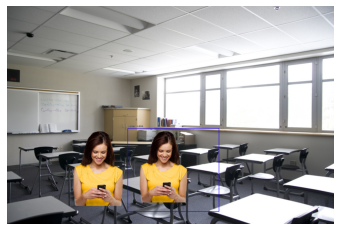

synthetic_images/fondo_19__3c5c18b4-918a-494a-852d-b6f26e39417f.jpg 1


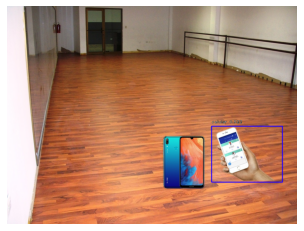

synthetic_images/fondo_1__f1d2075c-9468-413d-80d1-263e7bedee2c.jpg 2


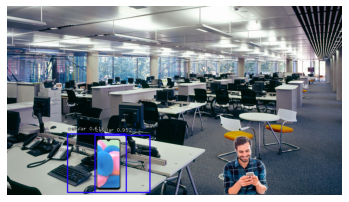

synthetic_images/fondo_4__5785441f-abfe-4508-963f-8489289c8c55.jpg 3


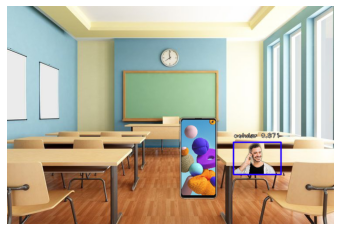

synthetic_images/fondo_16__c268d0c4-0d5b-484c-8ad8-3c2049db1970.jpg 4


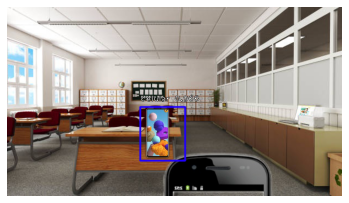

synthetic_images/fondo_2__e1550b0c-dc03-4d94-9746-b1be4ce52683.jpg 5


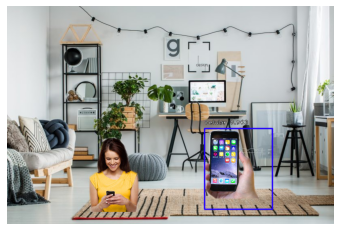

synthetic_images/fondo_19__aaa8072e-a667-4522-a888-a9984cdfdedb.jpg 6


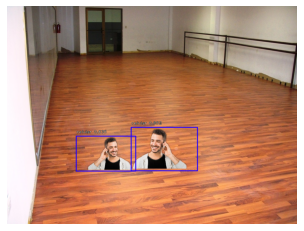

synthetic_images/fondo_11__000dd0a7-8049-4bea-b675-d3177f677ac6.jpg 7


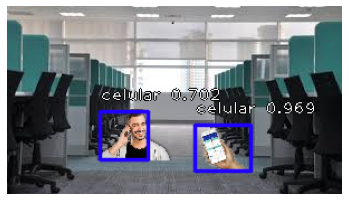

synthetic_images/fondo_8__b4a840b8-6480-4a92-a1d2-4173b130d179.jpg 8


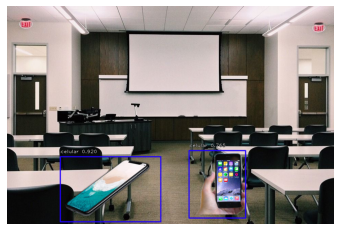

synthetic_images/fondo_10__7cd4e741-eb4d-40a6-af63-77813a94882c.jpg 9


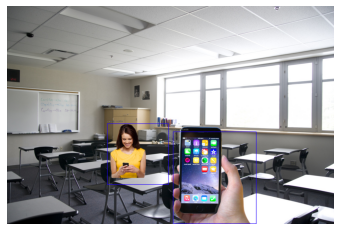

synthetic_images/fondo_16__ff20c9d6-8eb7-46b4-aac4-ee46f6320a46.jpg 10


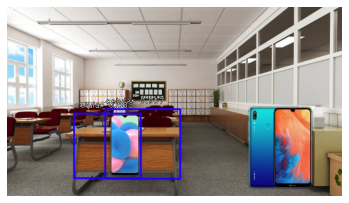

synthetic_images/fondo_19__b2284a77-96f8-46f0-aa62-505d277ae761.jpg 11


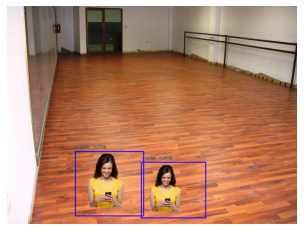

synthetic_images/fondo_10__8769f050-1e7d-4ce7-ab76-1ba77ebf862e.jpg 12


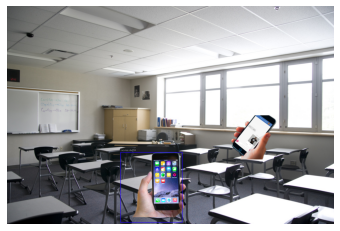

synthetic_images/fondo_12__bd902eae-68f2-45f0-93d9-623e6c0ce6db.jpg 13


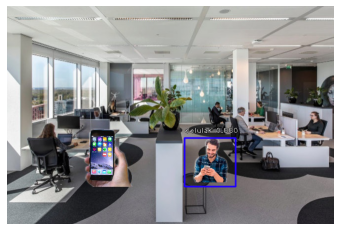

synthetic_images/fondo_17__8ade9079-5e1e-4092-8186-db111c6e9f6c.jpg 14


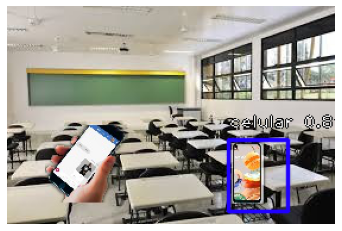

synthetic_images/fondo_12__18a3995f-62ea-4a8a-91d2-4febe76a881b.jpg 15


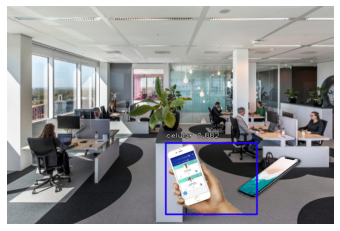

synthetic_images/fondo_11__6c8909f6-e615-4f1b-a965-1da793678957.jpg 16


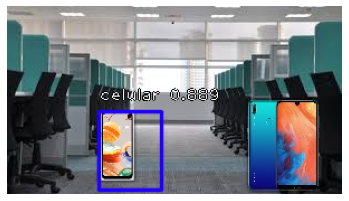

synthetic_images/fondo_12__2fcb3c15-1148-4189-8279-7c29adc8da5e.jpg 17


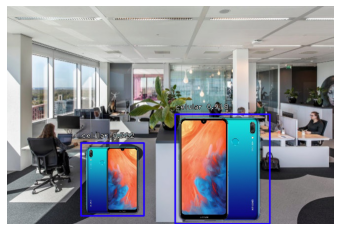

synthetic_images/fondo_15__4574c161-272a-4327-9e96-e2a1c0350eb7.jpg 18


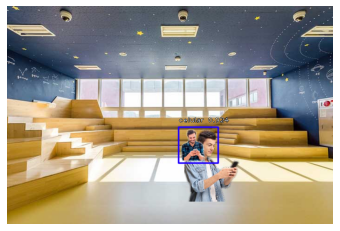

synthetic_images/fondo_13__7e31bee0-0728-4982-9d8a-e1cf0c4c674d.jpg 19


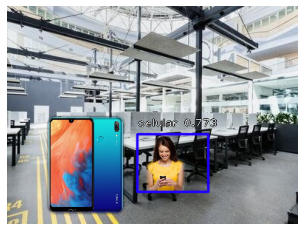

synthetic_images/fondo_16__03cb7eb5-c083-4d1b-8fab-b0d8e87620c4.jpg 20


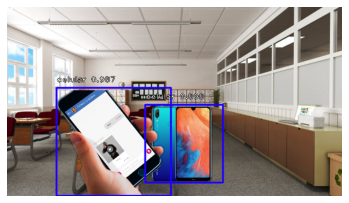

synthetic_images/fondo_20__042656e3-279d-4032-8624-8b2b5bbeb204.jpg 21


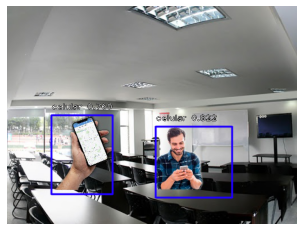

synthetic_images/fondo_11__dca8ad79-1e2f-4664-9262-d30a636d43ff.jpg 22


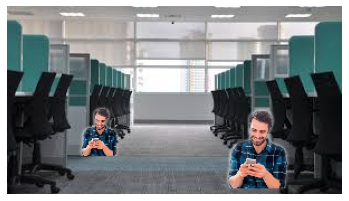

synthetic_images/fondo_11__cadf17ba-5822-4bf9-aa3c-c125c5adf687.jpg 23


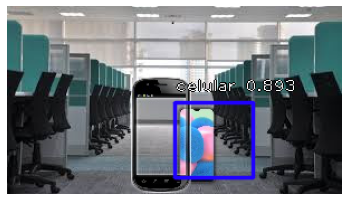

synthetic_images/fondo_16__03cb7eb5-c083-4d1b-8fab-b0d8e87620c4.jpg 24


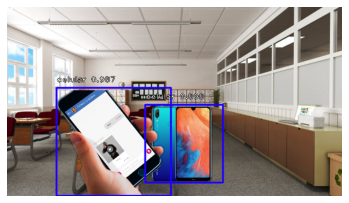

synthetic_images/fondo_14__e3f21347-e838-40ff-a1b3-b4371dcaaa19.jpg 25


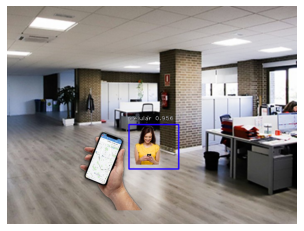

synthetic_images/fondo_2__bdb6bf18-62b1-4090-be56-e78541a8d39e.jpg 26


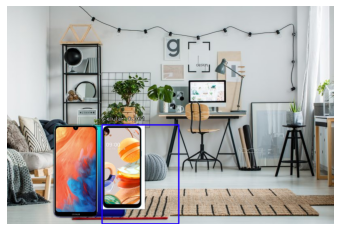

synthetic_images/fondo_11__000dd0a7-8049-4bea-b675-d3177f677ac6.jpg 27


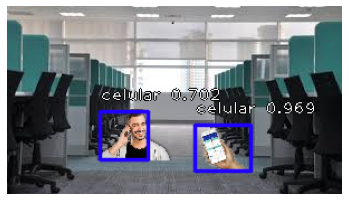

synthetic_images/fondo_20__f8ca7e82-971c-468e-8f30-bb33156785b4.jpg 28


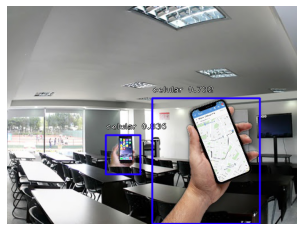

synthetic_images/fondo_13__8475a40f-b942-4b87-8644-8cf163e7c5a6.jpg 29


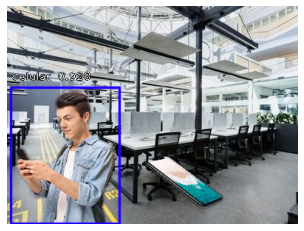

synthetic_images/fondo_13__ec481984-48fa-4459-9278-7b2add89a733.jpg 30


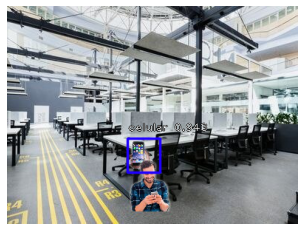

synthetic_images/fondo_19__bf37f66e-a131-44ce-8821-04082a53e09c.jpg 31


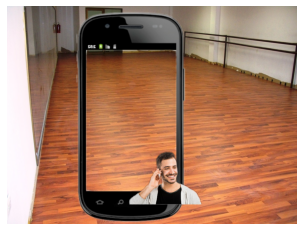

synthetic_images/fondo_11__8dd33fba-21d3-407f-84cc-e78e44362d7c.jpg 32


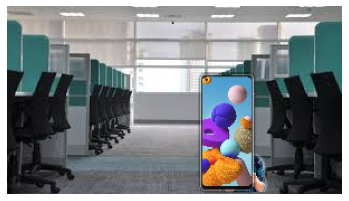

synthetic_images/fondo_14__6b0f5c1d-a1c4-4fa5-ae71-68e099882496.jpg 33


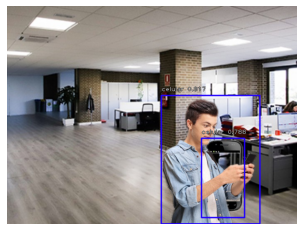

synthetic_images/fondo_13__49394874-52ae-43af-aa28-7d9f33c5ef1a.jpg 34


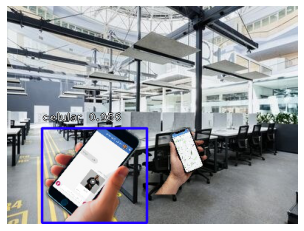

synthetic_images/fondo_10__511dd187-76b0-4bbf-b340-f5197b9cb457.jpg 35


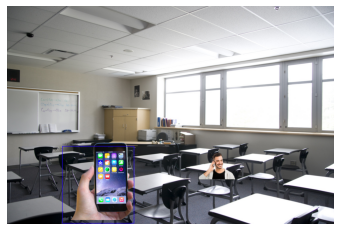

synthetic_images/fondo_11__517afc90-ca25-4cd1-ad61-9aa3ebc86493.jpg 36


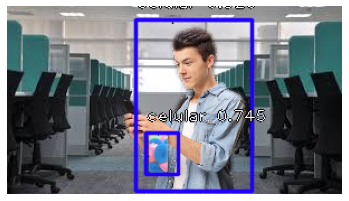

synthetic_images/fondo_10__8769f050-1e7d-4ce7-ab76-1ba77ebf862e.jpg 37


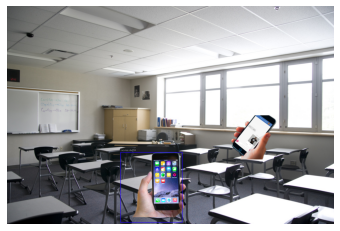

synthetic_images/fondo_11__517afc90-ca25-4cd1-ad61-9aa3ebc86493.jpg 38


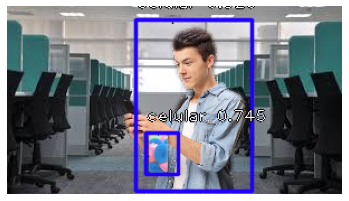

synthetic_images/fondo_12__bd902eae-68f2-45f0-93d9-623e6c0ce6db.jpg 39


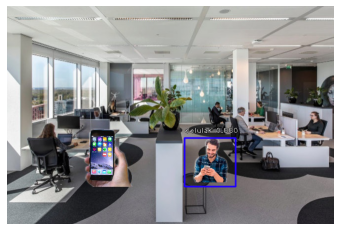

synthetic_images/fondo_10__db03a065-b647-409d-928d-75d37c2943da.jpg 40


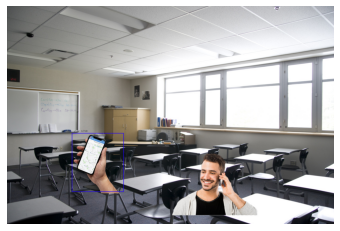

synthetic_images/fondo_17__9cbb6c67-05a9-479d-a1d9-0483a330cdd0.jpg 41


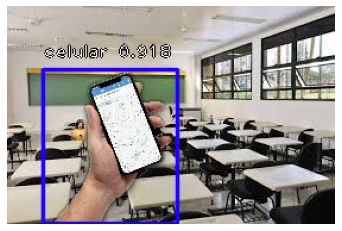

synthetic_images/fondo_10__386702e6-89d7-4365-90b1-72679441f11f.jpg 42


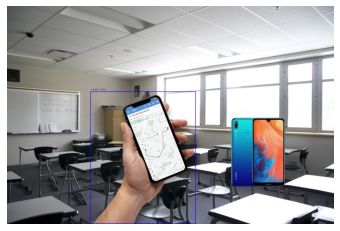

In [ ]:

# Recorremos todo el dataFramee de test para revisar las predicciones
for index, row in test_df.iterrows():
  print(row[0], index)
  image = io.imread(row[0])

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()


In [ ]:
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_42.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_43.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_44.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_45.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_46.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_47.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_48.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_49.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots" 
!cp -r "/content/keras-retinanet/snapshots/resnet50_csv_50.h5" "/content/drive/MyDrive/Hackathon/snapshots/snapshots"

In [ ]:
test_loss, test_acc = model.evaluate( train_generator)
print(f'Accuracy: {test_acc}')